<a href="https://colab.research.google.com/github/ranjan0601/Tweet_Sentiment_Analysis/blob/main/Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -

##### **Project Type**    - Classification ML
##### **Contribution**    - Individual

# **Project Summary -**

# **GitHub Link -**

https://github.com/ranjan0601/Tweet_Sentiment_Analysis/blob/main/Classification_Project.ipynb

# **Problem Statement**

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets. The tweets have been pulled from Twitter and manual tagging has been done then. The name and usernames have been given codes to avoid and privacy concerns.

It has fields name as Username, ScreenName, Location, TweetAt, Original Tweet, and Sentiment (Target Variable)

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.



# ***Let's Begin !***

## ***1. Know Your Data***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
path = ("/content/drive/MyDrive/Almabatter/ML Classification Project/")

In [4]:
df_original = pd.read_csv(path + "Coronavirus Tweets.csv", encoding="ISO-8859-1")

In [5]:
# Copy the data to preserve the original file
df = df_original.copy()

In [6]:
#checking the shape of the data
df.shape

(41157, 6)

##  The data has 41157 rows and 6 column

In [7]:
# checking the head, tail, info, describe, unique
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


## Location has some missing value, rest every column is complete

In [9]:
df.Location.nunique()  #checking the number of nuique value in location.

12220

In [10]:
df.isnull().sum()/df.shape[0]  # Chekcing the null value in percentage.

UserName         0.000000
ScreenName       0.000000
Location         0.208713
TweetAt          0.000000
OriginalTweet    0.000000
Sentiment        0.000000
dtype: float64

## 26% of location data is missing.

In [11]:
df.Location.mode() #Replacing the Nan value with mode

0    London
Name: Location, dtype: object

In [12]:
df["Location"].fillna("", inplace = True) #fILL NA Value in Location with blank string value in Location column

In [13]:
# Creating a new column by combining Location and OriginalTweet Column
df["Original_Tweet_comb"] = df["OriginalTweet"] + df["Location"]

In [14]:
df.isnull().sum()

UserName               0
ScreenName             0
Location               0
TweetAt                0
OriginalTweet          0
Sentiment              0
Original_Tweet_comb    0
dtype: int64

In [15]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Original_Tweet_comb
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [16]:
#For sentiment analysis we only want tweet and sentiment Features
df1 = df[['Original_Tweet_comb','Sentiment']]

In [17]:
df1.head()

,Original_Tweet_comb,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [18]:
df1.describe().T  #statistical analysis of data with .T as transpose value

,count,unique,top,freq
Original_Tweet_comb,41157,41157,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
Sentiment,41157,5,Positive,11422


In [19]:
df1.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

## This shows that sentiment has 5 Unique values which are Negative, Extremely Negative, Neutral, Positive, and Extremely Positive and the total rows are 41,157 with 2 columns

## <b>  Text Processing

In [20]:
df["OriginalTweet"] = df["OriginalTweet"].str.lower()
df['OriginalTweet']

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when @kameronwild...
41155    is it wrong that the smell of hand sanitizer i...
41156    @tartiicat well new/used rift s are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [21]:
df1["Original_Tweet_comb"] = df1["Original_Tweet_comb"].str.lower()
df1["Original_Tweet_comb"]

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when @kameronwild...
41155    is it wrong that the smell of hand sanitizer i...
41156    @tartiicat well new/used rift s are going for ...
Name: Original_Tweet_comb, Length: 41157, dtype: object

In [22]:
df1["Original_Tweet_comb"][0]

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8london'

In [23]:
df1["Original_Tweet_comb"] = df1['Original_Tweet_comb'].str.replace('http\S+|www.\S+', '', case=False)  #Removing URL from the column with case insensitive value

In [24]:
df1["Original_Tweet_comb"][0] #http, www. are removed from the string

'@menyrbie @phil_gahan @chrisitv  and  and '

In [25]:
import string
def remove_punctuations(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation,"")
  return text

In [26]:
df1["Clean_tweets"] = df1["Original_Tweet_comb"].apply(remove_punctuations)

In [27]:
df1["Clean_tweets"]

0                   menyrbie philgahan chrisitv  and  and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when kameronwilds...
41155    is it wrong that the smell of hand sanitizer i...
41156    tartiicat well newused rift s are going for 70...
Name: Clean_tweets, Length: 41157, dtype: object

In [28]:
df1["Clean_tweets"] = df1["Clean_tweets"].str.replace("[^a-zA-Z#//]"," ")  #It replaces all the special character other than A to Z
df1.head()

,Original_Tweet_comb,Sentiment,Clean_tweets
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,menyrbie philgahan chrisitv and and
1,advice talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,coronavirus australia: woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,my food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,"me, ready to go at supermarket during the #cov...",Extremely Negative,me ready to go at supermarket during the covid...


## <b>  Removing StopWords

In [29]:
#Importing stopwords
import nltk
from nltk.corpus import stopwords
stop = stopwords.words("english")

In [30]:
#function to remove stopwords and tokenize
def remove_stopwords(text):
  text = [word.lower() for word in text.split() if word.lower() not in stop]
  return (text)

In [31]:
df1["Clean_tweets"] = df1["Clean_tweets"].apply(remove_stopwords)

In [32]:
df1.head()

,Original_Tweet_comb,Sentiment,Clean_tweets
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,"[menyrbie, philgahan, chrisitv]"
1,advice talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p..."
2,coronavirus australia: woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld..."
3,my food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, dont, panic,..."
4,"me, ready to go at supermarket during the #cov...",Extremely Negative,"[ready, go, supermarket, covid, outbreak, im, ..."


## Stemming

In [33]:
from nltk.stem.porter import *
stemmer  = PorterStemmer()

In [34]:
#function for stemming
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [35]:
# function for stemming
def stemming(text):
  text = [stemmer.stem(word) for word in text]
  return (" ".join(text))

In [36]:
df1["stemmed"] = df1["Clean_tweets"].apply(stemming)

In [37]:
#result
df1.stemmed.head()

0                           menyrbi philgahan chrisitv
1    advic talk neighbour famili exchang phone numb...
2    coronaviru australia woolworth give elderli di...
3    food stock one empti pleas dont panic enough f...
4    readi go supermarket covid outbreak im paranoi...
Name: stemmed, dtype: object

### **Definition** :
**Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.**

### **Lemmentization**

In [38]:
#Lemmentization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [39]:
# Function to lemmatize a list of words
def lemmatize_words(words):
  words = [lemmatizer.lemmatize(word) for word in words]
  return (" ".join(words))

In [40]:
# Apply lemmatization to the "Clean_tweets" column
df1["lemmed"] = df1["Clean_tweets"].apply(lemmatize_words)

In [41]:
df1.head()

,Original_Tweet_comb,Sentiment,Clean_tweets,stemmed,lemmed
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,"[menyrbie, philgahan, chrisitv]",menyrbi philgahan chrisitv,menyrbie philgahan chrisitv
1,advice talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice talk neighbour family exchange phone nu...
2,coronavirus australia: woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,coronavirus australia woolworth give elderly d...
3,my food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, dont, panic,...",food stock one empti pleas dont panic enough f...,food stock one empty please dont panic enough ...
4,"me, ready to go at supermarket during the #cov...",Extremely Negative,"[ready, go, supermarket, covid, outbreak, im, ...",readi go supermarket covid outbreak im paranoi...,ready go supermarket covid outbreak im paranoi...


### **Definition** :

** Lemmatization is the grouping together of different forms of same word. In search queries, lemmaziation allows end user to query and version of a base word and get relevant results**

## <B>  EDA

In [42]:
sentiment_count = df1["Sentiment"].value_counts().reset_index().rename(columns = {"index" : "Sentiment", "Sentiment" : "Count"})
sentiment_count

,Sentiment,Count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'Count')

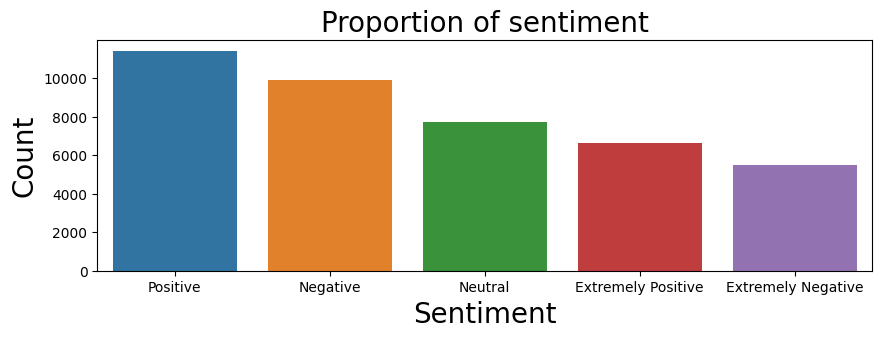

In [43]:
# Barplot
plt.figure(figsize = (10,3))
ax = sns.barplot(x = "Sentiment", y = "Count", data = sentiment_count)
ax.set_title("Proportion of sentiment", fontsize = 20)
ax.set_xlabel("Sentiment", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)

## Maximum has positve tweet sentiment on covid related news followed by negative, neutral, extremely postive and extremely negative

In [44]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_values)

In [45]:
# Combining multiple catagory to only 3 catagory as positive, neutral and negative sentiment
replace_values = {"Sentiment" : {"Extremely Negative" : "Negative", "Extremely Positive" : "Positive"}}
df1 = df1.replace(replace_values)

In [46]:
df1.Sentiment.value_counts() #checking

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

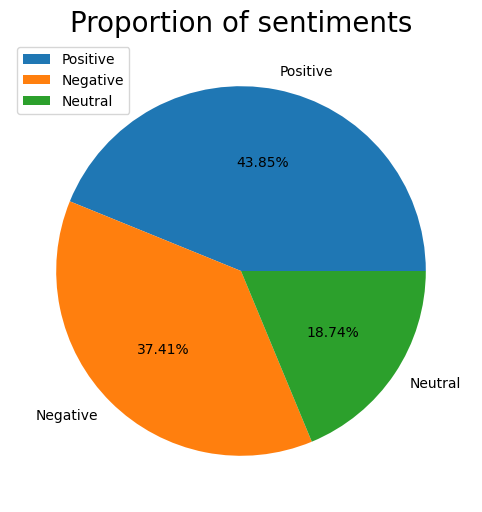

In [47]:
# Ploting pie chart
sentiment_count1 = df1["Sentiment"].value_counts().to_list()
labels = ["Positive", "Negative", "Neutral"]
plt.figure(figsize = (10,6))
plt.pie(x = sentiment_count1, labels = labels, autopct ="%.2f%%")
plt.title("Proportion of sentiments", fontsize = 20)
plt.legend(loc='upper left')
plt.show()

In [48]:
df1["temp_list"] = df1["Clean_tweets"].apply(lambda x: str(x).split())

In [49]:
df1.head()

,Original_Tweet_comb,Sentiment,Clean_tweets,stemmed,lemmed,temp_list
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,"[menyrbie, philgahan, chrisitv]",menyrbi philgahan chrisitv,menyrbie philgahan chrisitv,"[['menyrbie',, 'philgahan',, 'chrisitv']]"
1,advice talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice talk neighbour family exchange phone nu...,"[['advice',, 'talk',, 'neighbours',, 'family',..."
2,coronavirus australia: woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,coronavirus australia woolworth give elderly d...,"[['coronavirus',, 'australia',, 'woolworths',,..."
3,my food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, dont, panic,...",food stock one empti pleas dont panic enough f...,food stock one empty please dont panic enough ...,"[['food',, 'stock',, 'one',, 'empty',, 'please..."
4,"me, ready to go at supermarket during the #cov...",Negative,"[ready, go, supermarket, covid, outbreak, im, ...",readi go supermarket covid outbreak im paranoi...,ready go supermarket covid outbreak im paranoi...,"[['ready',, 'go',, 'supermarket',, 'covid',, '..."


In [50]:
from collections import Counter # importing counter library
top = Counter([item for sublist in df1["temp_list"] for item in sublist]) #list comprehension to get items and count list in form of dictionary
temp = pd.DataFrame(top.most_common(10)) # add the dictoinary in panda dataframe
temp.columns = ["Common_words", "Counts"] # Name the columns
temp.style.background_gradient(cmap="Reds")  #get the data in styple red format

,Common_words,Counts
0,"'covid',",20651
1,"'coronavirus',",14085
2,"'prices',",7547
3,"'store',",6679
4,"'food',",6671
5,"'supermarket',",6476
6,"'grocery',",5798
7,"'people',",5097
8,"'amp',",4930
9,"'consumer',",4100


## The most frequent word used in COVID, CORONAVIRUS, PRICES, STORE, FOOD, SUPERMARKET etc

## <B> Understanding most common word in postive sentiment

In [51]:
temp_list_positive = df1[df1["Sentiment"] == "Positive"]["Clean_tweets"].apply(lambda x: str(x).split())

In [52]:
temp_list_positive = pd.DataFrame(temp_list_positive)

In [53]:
temp_list_positive.head()

,Clean_tweets
1,"[['advice',, 'talk',, 'neighbours',, 'family',..."
2,"[['coronavirus',, 'australia',, 'woolworths',,..."
3,"[['food',, 'stock',, 'one',, 'empty',, 'please..."
5,"[['news',, 'region',, 'first',, 'confirmed',, ..."
6,"[['cashier',, 'grocery',, 'store',, 'sharing',..."


In [54]:
from collections import Counter # importing counter library
top = Counter([item for sublist in temp_list_positive["Clean_tweets"] for item in sublist]) #list comprehension to get items and count list in form of dictionary
temp = pd.DataFrame(top.most_common(10)) # add the dictoinary in panda dataframe
temp.columns = ["Common_words", "Counts"] # Name the columns
temp.style.background_gradient(cmap="Reds")  #get the data in styple red format

,Common_words,Counts
0,"'covid',",9185
1,"'coronavirus',",5890
2,"'store',",3236
3,"'grocery',",2843
4,"'prices',",2833
5,"'supermarket',",2796
6,"'food',",2658
7,"'amp',",2528
8,"'people',",2117
9,"'consumer',",1881


## Top 10 words with positive sentiments are Covid, Coronavirus, store, grocery, prices, supermarket, food, amp, people and consumer

## <B>  Creating dataframe to understand frequency of word based on sentiment and creating sentiment wise wordcloud

In [55]:
# Seperating the sentiment for word cloud
Neutral = pd.DataFrame(df1[["stemmed","lemmed"]] [df1["Sentiment"] == "Neutral"])
Positive = pd.DataFrame(df1[["stemmed", "lemmed"]] [df1["Sentiment"] == "Positive"])
Negative = pd.DataFrame(df1[["stemmed", "lemmed"]] [df1["Sentiment"] == "Negative"])

## <b> Checking the frequent word which is triggering Negative sentiment

In [56]:
Negative["negative_senti"] = Negative["lemmed"].apply(lambda x: str(x).split())

In [57]:
Negative.head()

,stemmed,lemmed,negative_senti
4,readi go supermarket covid outbreak im paranoi...,ready go supermarket covid outbreak im paranoi...,"[ready, go, supermarket, covid, outbreak, im, ..."
9,corona preventionw stop buy thing cash use onl...,corona preventionwe stop buy thing cash use on...,"[corona, preventionwe, stop, buy, thing, cash,..."
20,nation infict covid world must play fair china...,nation inficted covid world must play fair chi...,"[nation, inficted, covid, world, must, play, f..."
24,downingstreet grantshapp done ensur food essen...,downingstreet grantshapps done ensure food ess...,"[downingstreet, grantshapps, done, ensure, foo..."
26,prepar higher demand potenti food shortag hung...,preparation higher demand potential food short...,"[preparation, higher, demand, potential, food,..."


In [58]:
from collections import Counter # importing counter library
top = Counter([item for sublist in Negative["negative_senti"] for item in sublist]) #list comprehension to get items and count list in form of dictionary
temp = pd.DataFrame(top.most_common(30)) # add the dictoinary in panda dataframe
temp.columns = ["Common_words", "Counts"] # Name the columns
temp.style.background_gradient(cmap="Reds")  #get the data in styple red format

,Common_words,Counts
0,covid,8460
1,coronavirus,6085
2,price,4251
3,food,3606
4,supermarket,2976
5,people,2675
6,store,2655
7,grocery,2219
8,panic,1949
9,amp,1903


## <b> Checking the frequent word which is triggering Positive sentiment

In [59]:
Positive["positive_senti"] = Positive["lemmed"].apply(lambda x: str(x).split())

In [60]:
Positive.head()

,stemmed,lemmed,positive_senti
1,advic talk neighbour famili exchang phone numb...,advice talk neighbour family exchange phone nu...,"[advice, talk, neighbour, family, exchange, ph..."
2,coronaviru australia woolworth give elderli di...,coronavirus australia woolworth give elderly d...,"[coronavirus, australia, woolworth, give, elde..."
3,food stock one empti pleas dont panic enough f...,food stock one empty please dont panic enough ...,"[food, stock, one, empty, please, dont, panic,..."
5,news region first confirm covid case came sull...,news region first confirmed covid case came su...,"[news, region, first, confirmed, covid, case, ..."
6,cashier groceri store share insight covid prov...,cashier grocery store sharing insight covid pr...,"[cashier, grocery, store, sharing, insight, co..."


In [61]:
from collections import Counter # importing counter library
top = Counter([item for sublist in Positive["positive_senti"] for item in sublist]) #list comprehension to get items and count list in form of dictionary
temp = pd.DataFrame(top.most_common(30)) # add the dictoinary in panda dataframe
temp.columns = ["Common_words", "Counts"] # Name the columns
temp.style.background_gradient(cmap="Reds")  #get the data in styple red format

,Common_words,Counts
0,covid,10123
1,coronavirus,6756
2,store,3880
3,supermarket,3251
4,grocery,3241
5,price,3227
6,food,2864
7,amp,2540
8,consumer,2332
9,people,2301


In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def create_wordcloud_from_dataframe(df, column_name):
    # Concatenate all the stemmed words into a single string
    text = ' '.join(df[column_name].astype(str))

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


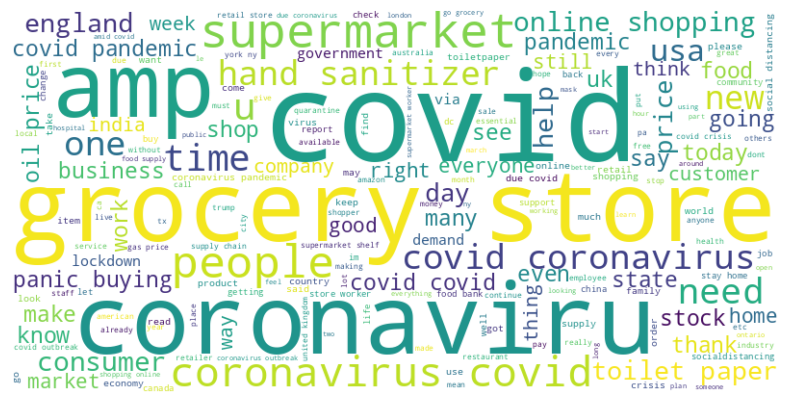

In [63]:
# Calling the function to get Wordcloud from dataframe and column name lemmed
create_wordcloud_from_dataframe(df1, 'lemmed')

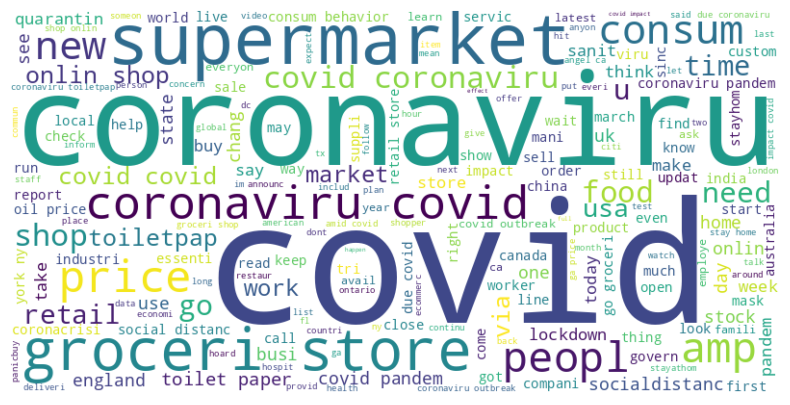

In [64]:
# Calling the function to get Wordcloud from dataframe Neutral and column name stemmed
create_wordcloud_from_dataframe(Neutral, 'stemmed')

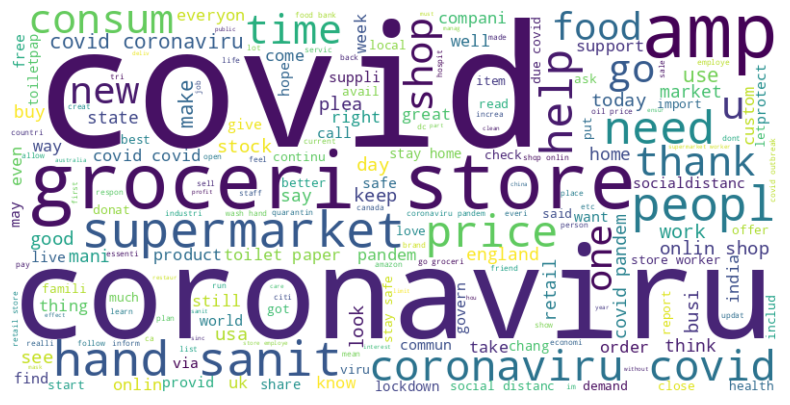

In [65]:
# Calling the function to get Wordcloud from dataframe Positive and column name stemmed
create_wordcloud_from_dataframe(Positive, 'stemmed')

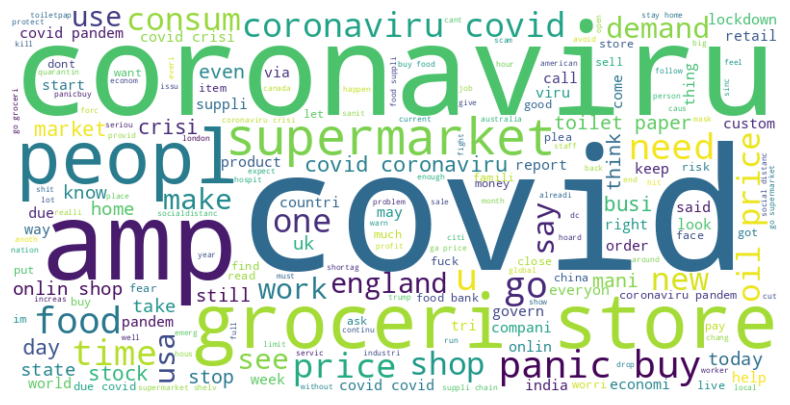

In [66]:
# Calling the function to get Wordcloud from dataframe Negative and column name stemmed
create_wordcloud_from_dataframe(Negative, 'stemmed')

## <b>  Data wrangling

In [67]:
sentimental_map = {"Positive" : 1, "Neutral" : 0, "Negative" : -1}
df1["Sentiment"] = df1["Sentiment"].map(sentimental_map)

In [68]:
df1.head()

,Original_Tweet_comb,Sentiment,Clean_tweets,stemmed,lemmed,temp_list
0,@menyrbie @phil_gahan @chrisitv and and,0,"[menyrbie, philgahan, chrisitv]",menyrbi philgahan chrisitv,menyrbie philgahan chrisitv,"[['menyrbie',, 'philgahan',, 'chrisitv']]"
1,advice talk to your neighbours family to excha...,1,"[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice talk neighbour family exchange phone nu...,"[['advice',, 'talk',, 'neighbours',, 'family',..."
2,coronavirus australia: woolworths to give elde...,1,"[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,coronavirus australia woolworth give elderly d...,"[['coronavirus',, 'australia',, 'woolworths',,..."
3,my food stock is not the only one which is emp...,1,"[food, stock, one, empty, please, dont, panic,...",food stock one empti pleas dont panic enough f...,food stock one empty please dont panic enough ...,"[['food',, 'stock',, 'one',, 'empty',, 'please..."
4,"me, ready to go at supermarket during the #cov...",-1,"[ready, go, supermarket, covid, outbreak, im, ...",readi go supermarket covid outbreak im paranoi...,ready go supermarket covid outbreak im paranoi...,"[['ready',, 'go',, 'supermarket',, 'covid',, '..."


In [69]:
df1.Sentiment.value_counts() #Checking

 1    18046
-1    15398
 0     7713
Name: Sentiment, dtype: int64

## <B> Train Test Split

In [70]:
corpus = []
for i in range(0, len(df1)):
    review = df1["stemmed"][i]
    review=review.split()
    review = [words for words in review if words not in set(stopwords.words('english'))]
    review = " ".join(review)
    corpus.append(review)

In [71]:
corpus[1:10]

['advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med orderuk',
 'coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak',
 'food stock one empti pleas dont panic enough food everyon take need stay calm stay safe covid franc covid covid coronaviru confin confinementot confinementgener',
 'readi go supermarket covid outbreak im paranoid food stock litterali empti coronaviru seriou thing pleas dont panic caus shortag coronavirusfr restezchezv stayathom confin',
 'news region first confirm covid case came sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper good timdodson report',
 'cashier groceri store share insight covid prove credibl comment im civic class know im talk',
 'supermarket today didnt buy toilet paper rebel toiletpapercrisi covid',
 'due covid retail store classroom atlanta open wa

In [74]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# Transforming the sting to sparse matrix to apply machine learning model
tf=TfidfVectorizer(max_features=5000)
X=tf.fit_transform(corpus).toarray()

In [75]:
y = df1["Sentiment"]

In [76]:
# Applying Train test split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify = y, random_state = 0)

In [77]:
#Checking the shape of the splitted data
print(x_train.shape)
y_test.shape

(28809, 5000)


(12348,)

## <b>  Model training and testing

## <b> Cross validation

In [78]:
from sklearn.naive_bayes import MultinomialNB
mlb = MultinomialNB()
mlb.fit(x_train,y_train)
y_pred=mlb.predict(x_train)
cross_val_score(mlb,X,y,cv=10,scoring='accuracy').mean()

0.6603981380783523

## <b> Logistic Regression Model

In [79]:
 from sklearn.pipeline import make_pipeline
 from sklearn.preprocessing import StandardScaler
 pipe = make_pipeline(StandardScaler(), LogisticRegression())
 pipe.fit(x_train, y_train)
 y_pred_log=pipe.predict(x_test)

In [80]:
accuracy_log = accuracy_score(y_test,y_pred_log)
accuracy_log

0.720683511499838

## <b> Applying Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
Y_pred_rf = rf.predict(x_test)

In [82]:
accuracy_rf=accuracy_score(y_test,Y_pred_rf)
accuracy_rf

0.7296728215095563

## <b> Applying Passive Aggressive Classifier

In [83]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier()
pac.fit(x_train,y_train)
y_pred_pac=pac.predict(x_test)

In [84]:
accuracy_pac=accuracy_score(y_test,y_pred_pac)
accuracy_pac

0.7553449951409135

## <b> Applying SGD Classifier

In [85]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(x_train,y_train)

sgd_prediction = sgd_clf.predict(x_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(x_train,y_train))
print("Testing accuracy Score : ",sgd_accuracy )

Training accuracy Score    :  0.8432087194973793
Testing accuracy Score :  0.7755102040816326


In [86]:
# Model's acurracy Score Comparision

acurracy = {'Model':  ['Logistic Regression', 'Random Forest Classifier','Passive Aggressive Classifier','SGD Classifier'],
        'Accuracy Score':  [accuracy_log, accuracy_rf, accuracy_pac, sgd_accuracy]}

Score_table= pd.DataFrame (acurracy, columns = ['Model','Accuracy Score'])

Score_table

,Model,Accuracy Score
0,Logistic Regression,0.720684
1,Random Forest Classifier,0.729673
2,Passive Aggressive Classifier,0.755345
3,SGD Classifier,0.775510


## <b> Conclusion

## 1. We applied Four ML model which are Logistic Regression, Random Forest Classifier, Passive Aggressive Classifier and SGD Classifier.
## 2. We get best result of accuracy from SGD Classifier.
## 3. Hence, we can choose SGD Classifier as the final model to implement which could analyse the tweet sentiment and predict the exact sentiment as Negative, Positive or Neutral (-1, +1, and 0 respectively)